## Thanh Nguyen-Duong
### DSC 540 Milestone 5
### Week 11 & 12
### 5/20/2020
____________________________

## Milestone 2 (Flat File)

#### Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:

* Replace Headers
* Format data into a more readable format
* Identify outliers and bad data
* Find duplicates
* Fix casing or inconsistent values
* Conduct Fuzzy Matching

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df_crime = pd.read_csv('louisville_crime2003to2017.csv')

C:\Users\Tommy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1) Replace headers

In [3]:
df_crime.head()

,Unnamed: 0,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,Time To Report in Days,YEAR_OCCURED
0,0,80-13-099806,2014-01-01 04:00:54,2013-12-20 12:31:00,"FRAUDULENT USE OF CREDIT CARDS U/$10,000",FRAUD,26B,PART II,COMPLETED,METRO LOUISVILLE,METRO,OTHER / UNKNOWN,COMMUNITY AT LARGE,LOUISVILLE,40056,830668,0.645764,2013.0
1,1,80-13-099861,2014-01-01 09:14:59,2013-12-22 03:00:00,THEFT OR DISP PARTS/CONT FROM VEH UNDER $500,VEHICLE BREAK-IN/THEFT,23F,PART I,COMPLETED,8TH DIVISION,823,RESIDENCE / HOME,14300 BLOCK WAKEFIELD PL ...,LOUISVILLE,40245,830675,0.260405,2013.0
2,2,80-13-099923,2014-01-01 19:52:19,2014-01-01 18:56:19,CRIMINAL MISCHIEF-2ND DEGREE,VANDALISM,290,PART II,COMPLETED,6TH DIVISION,624,PARKING LOT / GARAGE,4600 BLOCK WATTBOURNE LN ...,LOUISVILLE,40299,830683,0.038889,2014.0
3,3,80-13-099961,2014-01-01 01:38:01,2014-01-01 01:19:01,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,S 26TH ST / OSAGE AVE ...,LOUISVILLE,40210,830689,0.013194,2014.0
4,4,80-13-099953,2014-01-01 00:05:00,2014-01-01 00:00:00,TERRORISTIC THREATENING 3RD DEGREE,ASSAULT,13C,PART II,COMPLETED,4TH DIVISION,435,RESIDENCE / HOME,4000 BLOCK WOODRUFF AVE ...,LOUISVILLE,40215,830798,0.003472,2014.0


In [4]:
# Let's drop a few unwanted columns and only keep those relevant to the project

df = df_crime[['CRIME_TYPE', 'CITY', 'ZIP_CODE', 'YEAR_OCCURED', 'ID']]

In [5]:
df.head()

,CRIME_TYPE,CITY,ZIP_CODE,YEAR_OCCURED,ID
0,FRAUD,LOUISVILLE,40056,2013.0,830668
1,VEHICLE BREAK-IN/THEFT,LOUISVILLE,40245,2013.0,830675
2,VANDALISM,LOUISVILLE,40299,2014.0,830683
3,VANDALISM,LOUISVILLE,40210,2014.0,830689
4,ASSAULT,LOUISVILLE,40215,2014.0,830798


In [6]:
# Let's replace some headers to make it look nicer
df.rename(columns={'CRIME_TYPE': 'crime', 'CITY': 'City', 'ZIP_CODE': 'Zip Code', 'YEAR_OCCURED': 'year'}, inplace = True)

C:\Users\Tommy\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 2) Format Data to a Readable Format

In [7]:
# Rearranging the order of some columns 

df = df[['ID', 'year', 'crime','Zip Code', 'City']]

In [8]:
df.head()

,ID,year,crime,Zip Code,City
0,830668,2013.0,FRAUD,40056,LOUISVILLE
1,830675,2013.0,VEHICLE BREAK-IN/THEFT,40245,LOUISVILLE
2,830683,2014.0,VANDALISM,40299,LOUISVILLE
3,830689,2014.0,VANDALISM,40210,LOUISVILLE
4,830798,2014.0,ASSAULT,40215,LOUISVILLE


In [9]:
# This will convert zip_code column to string format

df['Zip Code'] = df['Zip Code'].astype(str)

### 3) Finding Duplicates

In [10]:
# Let's find duplicates and drop these from our dataset
df.drop_duplicates()

,ID,year,crime,Zip Code,City
0,830668,2013.0,FRAUD,40056,LOUISVILLE
1,830675,2013.0,VEHICLE BREAK-IN/THEFT,40245,LOUISVILLE
2,830683,2014.0,VANDALISM,40299,LOUISVILLE
3,830689,2014.0,VANDALISM,40210,LOUISVILLE
4,830798,2014.0,ASSAULT,40215,LOUISVILLE
...,...,...,...,...,...
1156493,1145530,2005.0,DRUGS/ALCOHOL VIOLATIONS,40219.0,LOUISVILLE
1156494,256019,2005.0,ASSAULT,40214.0,LOUISVILLE
1156495,257429,2005.0,SEX CRIMES,40218.0,LOUISVILLE
1156496,260318,2005.0,SEX CRIMES,40211.0,LOUISVILLE


### 4) Identify Outliers and Bad Data

For outliers, I will focus on year column 

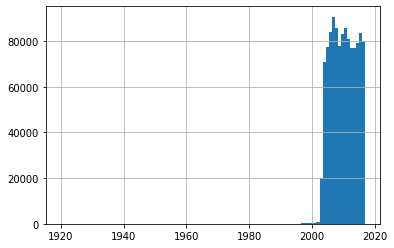

In [11]:
df['year'].hist(bins=100)

For the year column, anything before Year 2004 are outliers. Thus, I will remove all data for any year before 2004. 

In [12]:
df_1 = df[df.year >= 2004]
df_1 

,ID,year,crime,Zip Code,City
0,830668,2013.0,FRAUD,40056,LOUISVILLE
1,830675,2013.0,VEHICLE BREAK-IN/THEFT,40245,LOUISVILLE
2,830683,2014.0,VANDALISM,40299,LOUISVILLE
3,830689,2014.0,VANDALISM,40210,LOUISVILLE
4,830798,2014.0,ASSAULT,40215,LOUISVILLE
...,...,...,...,...,...
1156493,1145530,2005.0,DRUGS/ALCOHOL VIOLATIONS,40219.0,LOUISVILLE
1156494,256019,2005.0,ASSAULT,40214.0,LOUISVILLE
1156495,257429,2005.0,SEX CRIMES,40218.0,LOUISVILLE
1156496,260318,2005.0,SEX CRIMES,40211.0,LOUISVILLE


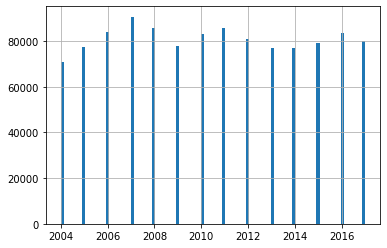

In [13]:
df_1['year'].hist(bins=100)

This histogram showing data for all year from 2004 - 2017 is much better now, with no outliers

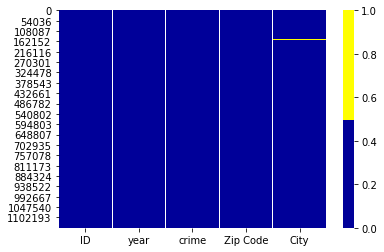

In [14]:
# Missing or bad data heatmap

cols = df_1.columns[:30]
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_1[cols].isnull(), cmap=sns.color_palette(colours))

This bad or null data heatmap shows us where the missing data are. Yellow is missing and blue is not. It seems we do not have any missing or null data in our dataset or the missing values population is very small to be observed. Thus, to be sure, I will use dropna() function to drop any NA values.

In [15]:
df_1 = df_1.dropna()
df_1

,ID,year,crime,Zip Code,City
0,830668,2013.0,FRAUD,40056,LOUISVILLE
1,830675,2013.0,VEHICLE BREAK-IN/THEFT,40245,LOUISVILLE
2,830683,2014.0,VANDALISM,40299,LOUISVILLE
3,830689,2014.0,VANDALISM,40210,LOUISVILLE
4,830798,2014.0,ASSAULT,40215,LOUISVILLE
...,...,...,...,...,...
1156493,1145530,2005.0,DRUGS/ALCOHOL VIOLATIONS,40219.0,LOUISVILLE
1156494,256019,2005.0,ASSAULT,40214.0,LOUISVILLE
1156495,257429,2005.0,SEX CRIMES,40218.0,LOUISVILLE
1156496,260318,2005.0,SEX CRIMES,40211.0,LOUISVILLE


We have dropped a total of 7,546 rows containing NA or missing values

### 5) Fix casing or inconsistent values


I will focus on crime and city column, to fix all capitalization and casing to lowercase for consistency

In [16]:
# Crime column casing fix

df_1['crime'].value_counts()
# make everything lower case.
df_1['crime'] = df_1['crime'].str.lower()
df_1['crime'].value_counts()

C:\Users\Tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


theft/larceny               197225
drugs/alcohol violations    191468
other                       163155
assault                     147072
burglary                     99267
vandalism                    93438
vehicle break-in/theft       86057
fraud                        47101
motor vehicle theft          43314
robbery                      22915
disturbing the peace         14381
weapons                      12118
sex crimes                    8529
dui                           1527
homicide                      1020
arson                          151
Name: crime, dtype: int64

In [17]:
# City column casing fix

df_1['City'].value_counts()
# make everything lower case.
df_1['City'] = df_1['City'].str.lower()
df_1['City'].value_counts()

C:\Users\Tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


louisville        1059970
lvil                37551
lyndon               3948
middletown           3901
shively              3829
                   ...   
miami                   1
mishawaka               1
new albany              1
nest                    1
shepherdsville          1
Name: City, Length: 200, dtype: int64

In [18]:
df_1 = df_1[df_1['City'] == 'louisville']


In [19]:
df_1

,ID,year,crime,Zip Code,City
0,830668,2013.0,fraud,40056,louisville
1,830675,2013.0,vehicle break-in/theft,40245,louisville
2,830683,2014.0,vandalism,40299,louisville
3,830689,2014.0,vandalism,40210,louisville
4,830798,2014.0,assault,40215,louisville
...,...,...,...,...,...
1156493,1145530,2005.0,drugs/alcohol violations,40219.0,louisville
1156494,256019,2005.0,assault,40214.0,louisville
1156495,257429,2005.0,sex crimes,40218.0,louisville
1156496,260318,2005.0,sex crimes,40211.0,louisville


#### One last look at our new and finished clean dataframe

In [20]:
df_crime_clean = df_1

In [21]:
df_crime_clean

,ID,year,crime,Zip Code,City
0,830668,2013.0,fraud,40056,louisville
1,830675,2013.0,vehicle break-in/theft,40245,louisville
2,830683,2014.0,vandalism,40299,louisville
3,830689,2014.0,vandalism,40210,louisville
4,830798,2014.0,assault,40215,louisville
...,...,...,...,...,...
1156493,1145530,2005.0,drugs/alcohol violations,40219.0,louisville
1156494,256019,2005.0,assault,40214.0,louisville
1156495,257429,2005.0,sex crimes,40218.0,louisville
1156496,260318,2005.0,sex crimes,40211.0,louisville


Previously, Milestone 3 goal was to scrape all available Zip codes from Kentucky and put all of the Zip codes into a dataframe. This week's milestone 4 will use that dataframe to pull weather information using API on OpenWeatherMap

## Milestone 3 (Web scraping data source)

#### The goal of this dataset and milestone is to scrape all available Zip codes from Kentucky for next milestone project to pull weather data from each zip code using API. I will put all Louisville city Zip codes into a data format. 

In [22]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd

In [23]:
# use get method to send a GET request to the URL
page = requests.post('https://www.zip-codes.com/state/ky.asp')

#passes the HTML of the page into the BeautifulSoup class
bs = BeautifulSoup(page.content)

#Uses Beautiful Soup to find and return all tables with id containing the string "tblZIP"
_tables = bs.find_all("table", id ="tblZIP")
print(len(_tables))
print(_tables)

1
[<table border="0" cellpadding="0" cellspacing="0" class="statTable" id="tblZIP" title="All Kentucky ZIP Codes, City, County, Classification, and Area Codes." width="99%">
<tr>
<td class="label" title="All ZIP Codes for Kentucky"><strong>ZIP Code</strong></td>
<td class="info" title="The official city name as designated by the USPS."><strong>City</strong></td>
<td class="info" title="The primary county or parish this ZIP Code serves."><strong>County</strong></td>
<td class="info" title="The classification type of this ZIP Code."><strong>Type</strong></td>
</tr><tr><td><a href="/zip-code/40003/zip-code-40003.asp" title="ZIP Code 40003">ZIP Code 40003</a></td><td><a href="/city/ky-bagdad.asp" title="Bagdad, KY">Bagdad</a></td><td><a href="/county/ky-shelby.asp">Shelby</a></td><td>Standard</td></tr><tr><td><a href="/zip-code/40004/zip-code-40004.asp" title="ZIP Code 40004">ZIP Code 40004</a></td><td><a href="/city/ky-bardstown.asp" title="Bardstown, KY">Bardstown</a></td><td><a href="/c

#### Format data into a more readable format


In [24]:
_zipcodeList = []

# find all a's in the first table
_AList = _tables[0].find_all('a')

# extract 'title' for all a's
for _a in _AList:
    if 'title' in _a.attrs.keys():
        _title = _a['title']
        
        # extract zipcodes string and append zipcodelist
        if _title.startswith('ZIP'):
            _zipcodeList.append(_title.split(' ')[-1])

# find length of the zipcodelist and print
print(len(_zipcodeList))
print(_zipcodeList)

944
['40003', '40004', '40006', '40007', '40008', '40009', '40010', '40011', '40012', '40013', '40014', '40018', '40019', '40020', '40022', '40023', '40025', '40026', '40027', '40031', '40032', '40033', '40036', '40037', '40040', '40041', '40045', '40046', '40047', '40048', '40049', '40050', '40051', '40052', '40055', '40056', '40057', '40058', '40059', '40060', '40061', '40062', '40063', '40065', '40066', '40067', '40068', '40069', '40070', '40071', '40075', '40076', '40077', '40078', '40104', '40107', '40108', '40109', '40110', '40111', '40115', '40117', '40118', '40119', '40121', '40122', '40129', '40140', '40142', '40143', '40144', '40145', '40146', '40150', '40152', '40153', '40155', '40157', '40159', '40160', '40161', '40162', '40165', '40166', '40170', '40171', '40175', '40176', '40177', '40178', '40201', '40202', '40203', '40204', '40205', '40206', '40207', '40208', '40209', '40210', '40211', '40212', '40213', '40214', '40215', '40216', '40217', '40218', '40219', '40220', '4022

In [25]:
df1 = pd.DataFrame(_zipcodeList)

In [26]:
df1.head()

,0
0,40003
1,40004
2,40006
3,40007
4,40008


#### Replace Header 

In [27]:
df = df1.rename(columns={0:'Zip Code'})


In [28]:
df.head()

,Zip Code
0,40003
1,40004
2,40006
3,40007
4,40008


#### Find Duplicates

In [29]:
# finding duplicates in zipcodelist
df.drop_duplicates()


,Zip Code
0,40003
1,40004
2,40006
3,40007
4,40008
...,...
939,42765
940,42776
941,42782
942,42784


#### Find and drop outliers or missing data

In [30]:
df.dropna()

,Zip Code
0,40003
1,40004
2,40006
3,40007
4,40008
...,...
939,42765
940,42776
941,42782
942,42784


#### Fix casing or inconsistent values

In [31]:
# checking each value count and uniqueness of all variable
df['Zip Code'].value_counts()
df['Zip Code'].unique()


array(['40003', '40004', '40006', '40007', '40008', '40009', '40010',
       '40011', '40012', '40013', '40014', '40018', '40019', '40020',
       '40022', '40023', '40025', '40026', '40027', '40031', '40032',
       '40033', '40036', '40037', '40040', '40041', '40045', '40046',
       '40047', '40048', '40049', '40050', '40051', '40052', '40055',
       '40056', '40057', '40058', '40059', '40060', '40061', '40062',
       '40063', '40065', '40066', '40067', '40068', '40069', '40070',
       '40071', '40075', '40076', '40077', '40078', '40104', '40107',
       '40108', '40109', '40110', '40111', '40115', '40117', '40118',
       '40119', '40121', '40122', '40129', '40140', '40142', '40143',
       '40144', '40145', '40146', '40150', '40152', '40153', '40155',
       '40157', '40159', '40160', '40161', '40162', '40165', '40166',
       '40170', '40171', '40175', '40176', '40177', '40178', '40201',
       '40202', '40203', '40204', '40205', '40206', '40207', '40208',
       '40209', '402

Seems like our scraped zip code data are all unique and no inconsistent zip code value presented. 

#### One last look at our data frame before we move to the next step of the project next week~ 

In [32]:
df_zip_codes = df

In [33]:
df_zip_codes

,Zip Code
0,40003
1,40004
2,40006
3,40007
4,40008
...,...
939,42765
940,42776
941,42782
942,42784


#### Next step in the project, I will use all of these scraped Louisville_Zip_codes to pull weather information with my API datasource!

************************

## Milestone 4 (API data source)
_____________________________

Previously, Milestone 3 goal was to scrape all available Zip codes from Kentucky and put all of the Zip codes into a dataframe. This week's milestone 4 will use that dataframe to pull weather information using API on OpenWeatherMap

In [34]:
# import libraries
import requests
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import pprint
import datetime
import time

In [35]:
# define get_weather function to extract data from API
def get_weather(code):
    API_KEY = '303edfe18e79163b5aa9cea46e5b8e65'
    url_base = 'http://api.openweathermap.org/data/2.5/weather?'
    url = url_base+'zip='+code+',us&appid='+API_KEY+'&units=imperial'
    r = requests.get(url)
    data = r.json()
    return data

# create used zip codes list and weather data list
used_list = []
weather_data = []

# extract data from API using each zip code from list
for zc in _zipcodeList[:len(_zipcodeList)]:
    # if zip code is not in used list perform next steps and append the used zipcode list
    if zc not in used_list :
        used_list.append(zc)        
        # try to get weather data from API and append weather_data list
        try:
            data1 = get_weather(zc)
            # wait for 0.2 sec to move to another step to limit number of calls per minute 
            time.sleep(0.2)
            weather_data.append(data1)
            print(data1)
            
        # prints message to user if unable to open url
        except requests.exceptions.ConnectionError as errc:
            # handle ConnectionError exception
            print('\033[91m ' +'***Connection Failure. Please try later.***'+'\033[0m')
            break

        # handle all other exceptions
        except Exception as e:
            print('\033[91m '+"Failure to Retrieve.Please try again"+'\033[0m')

{'coord': {'lon': -85.07, 'lat': 38.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.69, 'feels_like': 83.16, 'temp_min': 82.99, 'temp_max': 86, 'pressure': 1010, 'humidity': 45}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 230}, 'clouds': {'all': 1}, 'dt': 1591228267, 'sys': {'type': 1, 'id': 4088, 'country': 'US', 'sunrise': 1591179479, 'sunset': 1591232365}, 'timezone': -14400, 'id': 0, 'name': 'Bagdad', 'cod': 200}
{'coord': {'lon': -85.46, 'lat': 37.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.43, 'feels_like': 80.69, 'temp_min': 80.01, 'temp_max': 82.99, 'pressure': 1011, 'humidity': 42}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1591228267, 'sys': {'type': 1, 'id': 3505, 'country': 'US', 'sunrise': 1591179650, 'sunset': 1591232380}, 'timezone': -14400, 'id': 0, 'n

In [36]:
len(weather_data)

944

In [37]:
len(used_list)

944

In [38]:
# using == to check if lists are equal 
if used_list == _zipcodeList: 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical")

The lists are identical


In [39]:
# create 'weather.json' file with weather data
with open('weather.json', 'w') as outfile:
    json.dump(weather_data, outfile)

### 1. Format data into a more readable format

In [40]:
import ujson
import pandas as pd

with open('weather.json') as f:
    data = ujson.load(f)

df = pd.io.json.json_normalize(data)

C:\Users\Tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [41]:
df

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,wind.deg,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset,rain.1h,wind.gust,message
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591228e+09,-14400.0,0.0,Bagdad,200,-85.07,38.26,...,230.0,1.0,1.0,4088.0,US,1.591179e+09,1.591232e+09,NaN,NaN,NaN
1,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591228e+09,-14400.0,0.0,Bardstown,200,-85.46,37.81,...,240.0,1.0,1.0,3505.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN
2,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591228e+09,-14400.0,0.0,Bedford,200,-85.31,38.59,...,190.0,1.0,1.0,4519.0,US,1.591179e+09,1.591232e+09,NaN,NaN,NaN
3,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591228e+09,-14400.0,0.0,Bethlehem,200,-85.02,38.45,...,230.0,1.0,1.0,4088.0,US,1.591179e+09,1.591232e+09,NaN,NaN,NaN
4,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591228e+09,-14400.0,0.0,Bloomfield,200,-85.29,37.91,...,240.0,1.0,1.0,3505.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591229e+09,-18000.0,0.0,Munfordville,200,-85.92,37.29,...,220.0,1.0,1.0,4225.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN
940,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591229e+09,-14400.0,0.0,Sonora,200,-85.92,37.52,...,230.0,1.0,1.0,3967.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN
941,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591229e+09,-18000.0,0.0,Summersville,200,-85.62,37.34,...,220.0,1.0,1.0,7308.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN
942,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,16093.0,1.591229e+09,-14400.0,0.0,Upton,200,-85.91,37.46,...,230.0,1.0,1.0,3967.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN


In [42]:
df_clean = pd.concat([df.drop(['weather'], axis=1), 
                              df['weather'].apply(pd.Series)], axis=1)

In [43]:
df_clean

,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,main.temp,...,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset,rain.1h,wind.gust,message,0
0,stations,16093.0,1.591228e+09,-14400.0,0.0,Bagdad,200,-85.07,38.26,84.69,...,1.0,1.0,4088.0,US,1.591179e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
1,stations,16093.0,1.591228e+09,-14400.0,0.0,Bardstown,200,-85.46,37.81,81.43,...,1.0,1.0,3505.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
2,stations,16093.0,1.591228e+09,-14400.0,0.0,Bedford,200,-85.31,38.59,85.33,...,1.0,1.0,4519.0,US,1.591179e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
3,stations,16093.0,1.591228e+09,-14400.0,0.0,Bethlehem,200,-85.02,38.45,85.28,...,1.0,1.0,4088.0,US,1.591179e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
4,stations,16093.0,1.591228e+09,-14400.0,0.0,Bloomfield,200,-85.29,37.91,81.91,...,1.0,1.0,3505.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,stations,16093.0,1.591229e+09,-18000.0,0.0,Munfordville,200,-85.92,37.29,83.62,...,1.0,1.0,4225.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
940,stations,16093.0,1.591229e+09,-14400.0,0.0,Sonora,200,-85.92,37.52,83.19,...,1.0,1.0,3967.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
941,stations,16093.0,1.591229e+09,-18000.0,0.0,Summersville,200,-85.62,37.34,84.22,...,1.0,1.0,7308.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."
942,stations,16093.0,1.591229e+09,-14400.0,0.0,Upton,200,-85.91,37.46,84.09,...,1.0,1.0,3967.0,US,1.591180e+09,1.591232e+09,NaN,NaN,NaN,"{'id': 800, 'main': 'Clear', 'description': 'c..."


In [44]:
df_clean = df.drop(['dt', 'sys.type', 'visibility', 'base', 'timezone', 'id', 'cod', 'coord.lon', 'coord.lat', 'sys.country', 'sys.id', 'rain.1h', 'clouds.all',
                   'wind.gust', 'sys.sunrise', 'sys.sunset', 'message'], axis=1)

In [45]:
df_clean

,weather,name,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,wind.speed,wind.deg
0,"[{'id': 800, 'main': 'Clear', 'description': '...",Bagdad,84.69,83.16,82.99,86.00,1010.0,45.0,9.17,230.0
1,"[{'id': 800, 'main': 'Clear', 'description': '...",Bardstown,81.43,80.69,80.01,82.99,1011.0,42.0,4.70,240.0
2,"[{'id': 800, 'main': 'Clear', 'description': '...",Bedford,85.33,86.77,84.00,86.00,1010.0,51.0,6.93,190.0
3,"[{'id': 800, 'main': 'Clear', 'description': '...",Bethlehem,85.28,83.97,84.00,86.00,1010.0,45.0,9.17,230.0
4,"[{'id': 800, 'main': 'Clear', 'description': '...",Bloomfield,81.91,81.32,80.60,82.99,1011.0,42.0,4.70,240.0
...,...,...,...,...,...,...,...,...,...,...
939,"[{'id': 800, 'main': 'Clear', 'description': '...",Munfordville,83.62,79.66,81.00,86.00,1012.0,28.0,5.82,220.0
940,"[{'id': 800, 'main': 'Clear', 'description': '...",Sonora,83.19,83.10,82.40,84.00,1011.0,48.0,6.93,230.0
941,"[{'id': 800, 'main': 'Clear', 'description': '...",Summersville,84.22,82.53,82.40,86.00,1013.0,45.0,9.17,220.0
942,"[{'id': 800, 'main': 'Clear', 'description': '...",Upton,84.09,84.33,82.40,86.00,1011.0,48.0,6.93,230.0


In [46]:
df_clean['weather'].dropna(inplace= True)


In [47]:
# "weather" is a list containing
# one dictionary item. This is probably not the most efficient approach, but in
# order to do away with the list type, I create one big list of all the dictionary
# items, convert that to a pandas dataframe, and then contcatenate that, column-wise,
# to the clean dataset.

from collections import ChainMap

w = []
for L in df_clean['weather']:
    data = dict(ChainMap(*L))
    w.append(data)
    
df_w = pd.DataFrame(w)
df_weather_clean = pd.concat([df_clean, df_w], axis=1)
df_weather_clean.drop(['weather', 'icon'], axis=1, inplace=True)

In [48]:
df_weather_clean

,name,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,wind.speed,wind.deg,id,main,description
0,Bagdad,84.69,83.16,82.99,86.00,1010.0,45.0,9.17,230.0,800.0,Clear,clear sky
1,Bardstown,81.43,80.69,80.01,82.99,1011.0,42.0,4.70,240.0,800.0,Clear,clear sky
2,Bedford,85.33,86.77,84.00,86.00,1010.0,51.0,6.93,190.0,800.0,Clear,clear sky
3,Bethlehem,85.28,83.97,84.00,86.00,1010.0,45.0,9.17,230.0,800.0,Clear,clear sky
4,Bloomfield,81.91,81.32,80.60,82.99,1011.0,42.0,4.70,240.0,800.0,Clear,clear sky
...,...,...,...,...,...,...,...,...,...,...,...,...
939,Munfordville,83.62,79.66,81.00,86.00,1012.0,28.0,5.82,220.0,800.0,Clear,clear sky
940,Sonora,83.19,83.10,82.40,84.00,1011.0,48.0,6.93,230.0,NaN,NaN,NaN
941,Summersville,84.22,82.53,82.40,86.00,1013.0,45.0,9.17,220.0,NaN,NaN,NaN
942,Upton,84.09,84.33,82.40,86.00,1011.0,48.0,6.93,230.0,NaN,NaN,NaN


In [49]:
df_weather_clean = df_weather_clean.drop(['main.feels_like', 'id', 'wind.deg', 'main.pressure'], axis=1)

In [50]:
df_weather_clean

,name,main.temp,main.temp_min,main.temp_max,main.humidity,wind.speed,main,description
0,Bagdad,84.69,82.99,86.00,45.0,9.17,Clear,clear sky
1,Bardstown,81.43,80.01,82.99,42.0,4.70,Clear,clear sky
2,Bedford,85.33,84.00,86.00,51.0,6.93,Clear,clear sky
3,Bethlehem,85.28,84.00,86.00,45.0,9.17,Clear,clear sky
4,Bloomfield,81.91,80.60,82.99,42.0,4.70,Clear,clear sky
...,...,...,...,...,...,...,...,...
939,Munfordville,83.62,81.00,86.00,28.0,5.82,Clear,clear sky
940,Sonora,83.19,82.40,84.00,48.0,6.93,NaN,NaN
941,Summersville,84.22,82.40,86.00,45.0,9.17,NaN,NaN
942,Upton,84.09,82.40,86.00,48.0,6.93,NaN,NaN


### 2. Identify outliers and bad data

In [51]:
df_weather = df_weather_clean.dropna()

In [52]:
df_weather

,name,main.temp,main.temp_min,main.temp_max,main.humidity,wind.speed,main,description
0,Bagdad,84.69,82.99,86.00,45.0,9.17,Clear,clear sky
1,Bardstown,81.43,80.01,82.99,42.0,4.70,Clear,clear sky
2,Bedford,85.33,84.00,86.00,51.0,6.93,Clear,clear sky
3,Bethlehem,85.28,84.00,86.00,45.0,9.17,Clear,clear sky
4,Bloomfield,81.91,80.60,82.99,42.0,4.70,Clear,clear sky
...,...,...,...,...,...,...,...,...
935,Mannsville,83.43,82.40,84.20,45.0,9.17,Clear,clear sky
936,Marrowbone,81.37,77.00,86.00,28.0,5.82,Clear,clear sky
937,Millwood,84.00,84.00,84.00,60.0,1.99,Clear,clear sky
938,Mount Sherman,83.01,82.40,84.20,45.0,9.17,Clear,clear sky


### 3. Find Duplicates

In [53]:
df_weather = df_weather.drop_duplicates()

In [54]:
df_weather

,name,main.temp,main.temp_min,main.temp_max,main.humidity,wind.speed,main,description
0,Bagdad,84.69,82.99,86.00,45.0,9.17,Clear,clear sky
1,Bardstown,81.43,80.01,82.99,42.0,4.70,Clear,clear sky
2,Bedford,85.33,84.00,86.00,51.0,6.93,Clear,clear sky
3,Bethlehem,85.28,84.00,86.00,45.0,9.17,Clear,clear sky
4,Bloomfield,81.91,80.60,82.99,42.0,4.70,Clear,clear sky
...,...,...,...,...,...,...,...,...
935,Mannsville,83.43,82.40,84.20,45.0,9.17,Clear,clear sky
936,Marrowbone,81.37,77.00,86.00,28.0,5.82,Clear,clear sky
937,Millwood,84.00,84.00,84.00,60.0,1.99,Clear,clear sky
938,Mount Sherman,83.01,82.40,84.20,45.0,9.17,Clear,clear sky


### 4. Replace Headers

In [55]:
df_weather.rename(columns = {'name':'City', 'main.temp':'Temperature', 'main.temp_min':'Min_Temperature', 'main.temp_max':'Max_Temperature',
                            'main.humidity':'Humidity', 'wind.speed':'Wind_Speed', 'main':'Sky', 'description':'Description'}, inplace = True)

C:\Users\Tommy\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
df_weather

,City,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description
0,Bagdad,84.69,82.99,86.00,45.0,9.17,Clear,clear sky
1,Bardstown,81.43,80.01,82.99,42.0,4.70,Clear,clear sky
2,Bedford,85.33,84.00,86.00,51.0,6.93,Clear,clear sky
3,Bethlehem,85.28,84.00,86.00,45.0,9.17,Clear,clear sky
4,Bloomfield,81.91,80.60,82.99,42.0,4.70,Clear,clear sky
...,...,...,...,...,...,...,...,...
935,Mannsville,83.43,82.40,84.20,45.0,9.17,Clear,clear sky
936,Marrowbone,81.37,77.00,86.00,28.0,5.82,Clear,clear sky
937,Millwood,84.00,84.00,84.00,60.0,1.99,Clear,clear sky
938,Mount Sherman,83.01,82.40,84.20,45.0,9.17,Clear,clear sky


### 5. Fix casing or inconsistent values

In [57]:
# Description column casing fix

df_weather['Description'].value_counts()
# make everything to have consistent casing.
df_weather['Description'] = df_weather['Description'].str.title()
df_weather['Description'].value_counts()

C:\Users\Tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Clear Sky           744
Scattered Clouds     48
Light Rain           45
Few Clouds           18
Haze                  1
Name: Description, dtype: int64

In [58]:
df_weather

,City,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description
0,Bagdad,84.69,82.99,86.00,45.0,9.17,Clear,Clear Sky
1,Bardstown,81.43,80.01,82.99,42.0,4.70,Clear,Clear Sky
2,Bedford,85.33,84.00,86.00,51.0,6.93,Clear,Clear Sky
3,Bethlehem,85.28,84.00,86.00,45.0,9.17,Clear,Clear Sky
4,Bloomfield,81.91,80.60,82.99,42.0,4.70,Clear,Clear Sky
...,...,...,...,...,...,...,...,...
935,Mannsville,83.43,82.40,84.20,45.0,9.17,Clear,Clear Sky
936,Marrowbone,81.37,77.00,86.00,28.0,5.82,Clear,Clear Sky
937,Millwood,84.00,84.00,84.00,60.0,1.99,Clear,Clear Sky
938,Mount Sherman,83.01,82.40,84.20,45.0,9.17,Clear,Clear Sky


In [59]:
# City column casing fix

df_weather['City'].value_counts()
# make everything to have consistent casing
df_weather['City'] = df_weather['City'].str.title()
df_weather['City'].value_counts()

C:\Users\Tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Louisville       32
Lexington         8
Covington         5
Bowling Green     4
London            4
                 ..
Lynch             1
White Plains      1
Phyllis           1
Lucas             1
Harlan            1
Name: City, Length: 779, dtype: int64

In [60]:
# Sky column casing fix

df_weather['Sky'].value_counts()
# make everything to have consistent casing
df_weather['Sky'] = df_weather['Sky'].str.title()
df_weather['Sky'].value_counts()

C:\Users\Tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Clear     744
Clouds     66
Rain       45
Haze        1
Name: Sky, dtype: int64

In [61]:
df_weather

,City,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description
0,Bagdad,84.69,82.99,86.00,45.0,9.17,Clear,Clear Sky
1,Bardstown,81.43,80.01,82.99,42.0,4.70,Clear,Clear Sky
2,Bedford,85.33,84.00,86.00,51.0,6.93,Clear,Clear Sky
3,Bethlehem,85.28,84.00,86.00,45.0,9.17,Clear,Clear Sky
4,Bloomfield,81.91,80.60,82.99,42.0,4.70,Clear,Clear Sky
...,...,...,...,...,...,...,...,...
935,Mannsville,83.43,82.40,84.20,45.0,9.17,Clear,Clear Sky
936,Marrowbone,81.37,77.00,86.00,28.0,5.82,Clear,Clear Sky
937,Millwood,84.00,84.00,84.00,60.0,1.99,Clear,Clear Sky
938,Mount Sherman,83.01,82.40,84.20,45.0,9.17,Clear,Clear Sky


#### This is our finished and cleaned dataframe using Zip codes scraped from a website (Milestone 3) and used those Zip codes to pull weather information data and stored into a dataframe (Milestone 4)

#### I will load one more flat file to include all zip codes with its associated cities for merging with common key "Zip codes"

In [62]:
import pandas as pd

df_KY_zip = pd.read_csv('KY Zip code list.csv')

In [63]:
df_KY_zip

,Zip Code,City,Counties
0,40003,Bagdad,Shelby
1,40004,Bardstown,Nelson
2,40006,Bedford,Trimble
3,40007,Bethlehem,Henry
4,40008,Bloomfield,Nelson
...,...,...,...
939,42765,Munfordville,Hart
940,42776,Sonora,Hardin
941,42782,Summersville,Green
942,42784,Upton,Hardin


In [64]:
df_KY_zip.dtypes

Zip Code     int64
City        object
Counties    object
dtype: object

In [65]:
df_zip_codes.dtypes

Zip Code    object
dtype: object

In [66]:
df_KY_Zip = df_KY_zip.astype(str)

In [67]:
df_KY_Zip.dtypes

Zip Code    object
City        object
Counties    object
dtype: object

In [68]:
df_city_zip = pd.merge(df_KY_Zip, df_zip_codes, on ='Zip Code', how='inner')

##### I have merged City and its associated Zip Code

In [69]:
df_city_zip

,Zip Code,City,Counties
0,40003,Bagdad,Shelby
1,40004,Bardstown,Nelson
2,40006,Bedford,Trimble
3,40007,Bethlehem,Henry
4,40008,Bloomfield,Nelson
...,...,...,...
939,42765,Munfordville,Hart
940,42776,Sonora,Hardin
941,42782,Summersville,Green
942,42784,Upton,Hardin


##### Next is to merge Zip code, city and weather df

In [70]:
df_city_weather = pd.merge(df_city_zip, df_weather, on ='City', how='inner')

In [71]:
df_city_weather

,Zip Code,City,Counties,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description
0,40003,Bagdad,Shelby,84.69,82.99,86.00,45.0,9.17,Clear,Clear Sky
1,40004,Bardstown,Nelson,81.43,80.01,82.99,42.0,4.70,Clear,Clear Sky
2,40006,Bedford,Trimble,85.33,84.00,86.00,51.0,6.93,Clear,Clear Sky
3,40007,Bethlehem,Henry,85.28,84.00,86.00,45.0,9.17,Clear,Clear Sky
4,40008,Bloomfield,Nelson,81.91,80.60,82.99,42.0,4.70,Clear,Clear Sky
...,...,...,...,...,...,...,...,...,...,...
3399,42758,Mannsville,Taylor,83.43,82.40,84.20,45.0,9.17,Clear,Clear Sky
3400,42759,Marrowbone,Cumberland,81.37,77.00,86.00,28.0,5.82,Clear,Clear Sky
3401,42762,Millwood,Grayson,84.00,84.00,84.00,60.0,1.99,Clear,Clear Sky
3402,42764,Mount Sherman,Larue,83.01,82.40,84.20,45.0,9.17,Clear,Clear Sky


#### Check to see if there's any duplicates

In [72]:
df_city_weather = df_city_weather.drop_duplicates(subset='Zip Code', keep="first")


In [73]:
df_city_weather

,Zip Code,City,Counties,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description
0,40003,Bagdad,Shelby,84.69,82.99,86.00,45.0,9.17,Clear,Clear Sky
1,40004,Bardstown,Nelson,81.43,80.01,82.99,42.0,4.70,Clear,Clear Sky
2,40006,Bedford,Trimble,85.33,84.00,86.00,51.0,6.93,Clear,Clear Sky
3,40007,Bethlehem,Henry,85.28,84.00,86.00,45.0,9.17,Clear,Clear Sky
4,40008,Bloomfield,Nelson,81.91,80.60,82.99,42.0,4.70,Clear,Clear Sky
...,...,...,...,...,...,...,...,...,...,...
3399,42758,Mannsville,Taylor,83.43,82.40,84.20,45.0,9.17,Clear,Clear Sky
3400,42759,Marrowbone,Cumberland,81.37,77.00,86.00,28.0,5.82,Clear,Clear Sky
3401,42762,Millwood,Grayson,84.00,84.00,84.00,60.0,1.99,Clear,Clear Sky
3402,42764,Mount Sherman,Larue,83.01,82.40,84.20,45.0,9.17,Clear,Clear Sky


#### We will only focus on Louisville, KY 

In [74]:
df_louisville_weather = df_city_weather[df_city_weather['City'] == 'Louisville']



In [75]:
df_louisville_weather

,Zip Code,City,Counties,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description
98,40201,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
130,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
162,40203,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
194,40204,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
226,40205,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
...,...,...,...,...,...,...,...,...,...,...
2050,40295,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
2082,40296,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
2114,40297,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky
2146,40298,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky


#### Last step is to merge louisville weather dataframe with Louisville crime dataframe

In [76]:
df_louisville = pd.merge(df_louisville_weather, df_crime_clean, on ='Zip Code', how='inner')

In [77]:
df_louisville

,Zip Code,City_x,Counties,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description,ID,year,crime,City_y
0,40201,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,1071446,2017.0,other,louisville
1,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830810,2014.0,assault,louisville
2,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830848,2014.0,assault,louisville
3,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831195,2014.0,theft/larceny,louisville
4,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831285,2013.0,theft/larceny,louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183363,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,468205,2009.0,vandalism,louisville
183364,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,485090,2009.0,other,louisville
183365,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,487789,2009.0,vehicle break-in/theft,louisville
183366,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,487790,2009.0,motor vehicle theft,louisville


In [78]:
df_louisville = df_louisville.drop_duplicates(subset='ID', keep="first")


In [79]:
df_louisville

,Zip Code,City_x,Counties,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description,ID,year,crime,City_y
0,40201,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,1071446,2017.0,other,louisville
1,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830810,2014.0,assault,louisville
2,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830848,2014.0,assault,louisville
3,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831195,2014.0,theft/larceny,louisville
4,40202,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831285,2013.0,theft/larceny,louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183363,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,468205,2009.0,vandalism,louisville
183364,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,485090,2009.0,other,louisville
183365,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,487789,2009.0,vehicle break-in/theft,louisville
183366,40299,Louisville,Jefferson,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,487790,2009.0,motor vehicle theft,louisville


In [80]:
df_louisville.drop(['City_y', 'Counties'], axis=1, inplace=True)

In [81]:
df_louisville.rename(columns={'City_x':'City', 'year':'Year', 'crime':'Crime', 'Zip Code': 'Zip_code'}, inplace = True)

In [82]:
df_louisville_crime = df_louisville

### This is our final cleaned, merged dataframe from all data sources

In [83]:
df_louisville_crime

,Zip_code,City,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description,ID,Year,Crime
0,40201,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,1071446,2017.0,other
1,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830810,2014.0,assault
2,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830848,2014.0,assault
3,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831195,2014.0,theft/larceny
4,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831285,2013.0,theft/larceny
...,...,...,...,...,...,...,...,...,...,...,...,...
183363,40299,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,468205,2009.0,vandalism
183364,40299,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,485090,2009.0,other
183365,40299,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,487789,2009.0,vehicle break-in/theft
183366,40299,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,487790,2009.0,motor vehicle theft


#### Storing our master dataframe into a database

In [85]:
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import plotnine as p9

In [86]:
engine = create_engine('sqlite:///louisville_crime_data.db')

In [87]:
df_louisville_crime.to_sql(
    name='louisville_crime',
    con=engine,
    index=False,
    if_exists='replace'
)

In [88]:
# reading datafrom the database
pd.read_sql("SELECT * FROM louisville_crime",engine).head()

,Zip_code,City,Temperature,Min_Temperature,Max_Temperature,Humidity,Wind_Speed,Sky,Description,ID,Year,Crime
0,40201,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,1071446,2017.0,other
1,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830810,2014.0,assault
2,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,830848,2014.0,assault
3,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831195,2014.0,theft/larceny
4,40202,Louisville,85.77,84.0,87.8,42.0,10.29,Clear,Clear Sky,831285,2013.0,theft/larceny


## Pulling data from database to do some visualizations

### Louisville Crime Distribution Based on Types Graph

In [89]:
# Plotting Crime Count based on Crime types

Crime = pd.read_sql("SELECT Crime FROM louisville_crime",engine).astype(str)

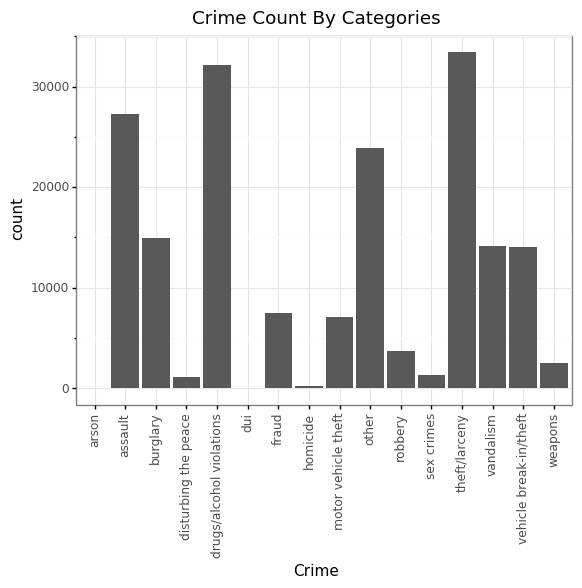

<ggplot: (-9223371889865510392)>

In [90]:
(p9.ggplot(data=Crime,
           mapping=p9.aes(x='factor(Crime)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.xlab("Crime") + p9.ggtitle("Crime Count By Categories")
)

**Based on the graph, we can see that theft/larceny and drugs/alcohol violations are among the top crimes in Louisville, KY**

### Crime Rate in Louisville throughout the years (2004 - 2017)

In [91]:
Year = pd.read_sql("SELECT Year FROM louisville_crime",engine).astype(float)

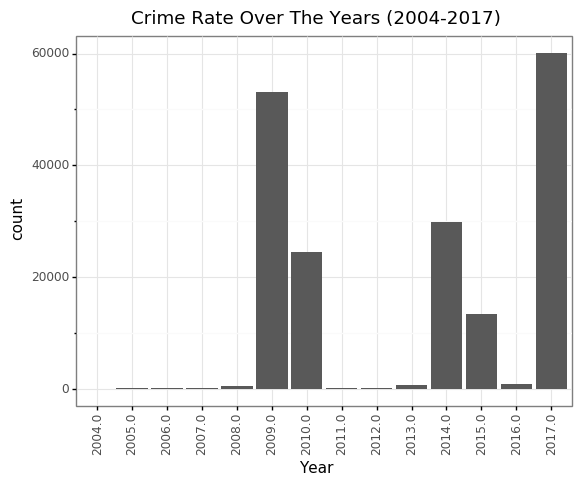

<ggplot: (-9223371889865451276)>

In [92]:
(p9.ggplot(data=Year,
           mapping=p9.aes(x='factor(Year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.ggtitle("Crime Rate Over The Years (2004-2017)")
    + p9.xlab("Year")
)

**2017 had the highest crime count with 60,000 crimes in Louisville followed by 2009 with more than 50,000 crime count**

### 2017 Crime Count based on Zip codes

In [93]:
zip_code = pd.read_sql("SELECT Zip_code FROM louisville_crime where Year = '2017'",engine).astype(str)

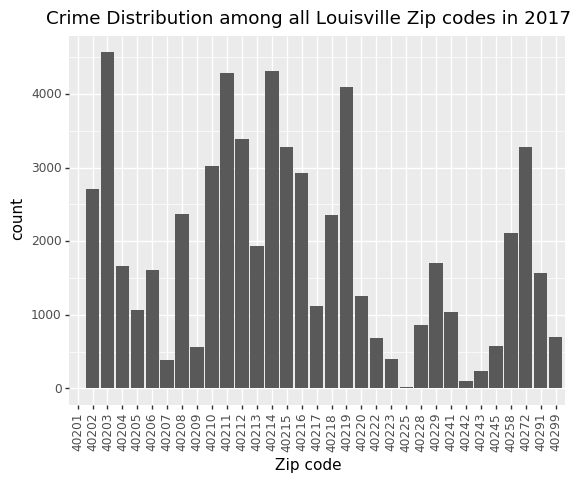

<ggplot: (-9223371889865475924)>

In [94]:
(p9.ggplot(data=zip_code,
           mapping=p9.aes(x='Zip_code'))
    + p9.geom_bar()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.xlab("Zip code")
    + p9.ggtitle("Crime Distribution among all Louisville Zip codes in 2017")
)

**40203 is the Zip code in Louisville that has the highest Crime count in 2017, followed by 40211 and 40214**

In [95]:
crime_40203 = pd.read_sql("SELECT Crime FROM louisville_crime where Zip_code = '40203' and Year = '2017'",engine).astype(str)

### Looking at Crime Type distribution specifically for Zip code 40203 (Highest Crime Rate) for the Year 2017

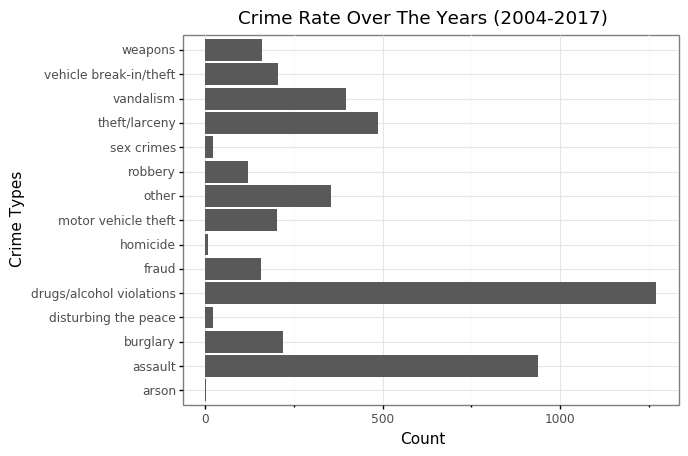

<ggplot: (-9223371889863005836)>

In [96]:
(p9.ggplot(data=crime_40203,
           mapping=p9.aes(x='factor(Crime)')) + p9.coord_flip() 
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text())
    + p9.labs(title = "Crime Rate Over The Years (2004-2017)", y = "Count", x = 'Crime Types'))

**In 2017, Zip code 40203 had the highest crime count compared to all other Zip codes of Louisville. Drugs/alcohol violations contributed the most of these crimes**

### Variation of Temperatures between all 32 Zip codes of Louisville

In [97]:
temperatures = pd.read_sql("SELECT Temperature FROM louisville_crime group by Zip_code",engine).astype(float)
max_temp = pd.read_sql("SELECT Max_Temperature FROM louisville_crime group by Zip_code",engine).astype(float)
min_temp = pd.read_sql("SELECT Min_Temperature FROM louisville_crime group by Zip_code",engine).astype(float)

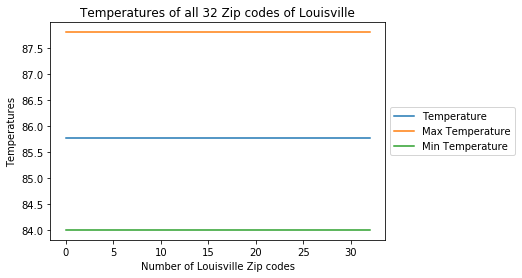

In [98]:
plt.plot(temperatures,label="Temperature")
plt.plot(max_temp,label="Max Temperature")
plt.plot(min_temp, label = "Min Temperature")
# Adding legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperatures of all 32 Zip codes of Louisville')
plt.xlabel('Number of Louisville Zip codes')
plt.ylabel('Temperatures')
plt.show()

**It looks like all Zip codes in Louisville had approximately the same temperatures**

### Wind and Humidity for all Zip codes in Louisville, KY

In [99]:
humid = pd.read_sql("SELECT Humidity FROM louisville_crime group by Zip_code" ,engine).astype(float)
wind = pd.read_sql("SELECT Wind_Speed FROM louisville_crime group by Zip_code",engine).astype(float)

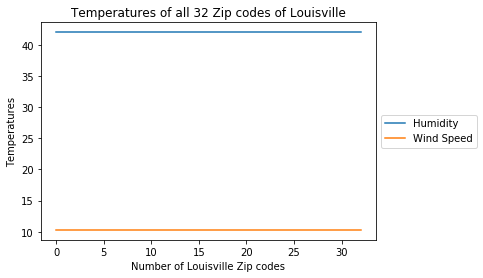

In [100]:
plt.plot(humid, label = 'Humidity')
plt.plot(wind, label = 'Wind Speed')
# Adding legend, axis labels and Title
plt.title('Temperatures of all 32 Zip codes of Louisville')
plt.xlabel('Number of Louisville Zip codes')
plt.ylabel('Temperatures')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**For all 32 Zip codes of Louisville, it had similar humidity level of more than 80 and a wind speed of around 5-6**

### City of Louisville, KY Temperature Range

In [101]:
temperatures1 = pd.read_sql("SELECT Temperature, Max_Temperature, Min_Temperature FROM louisville_crime group by City",engine).astype(float)

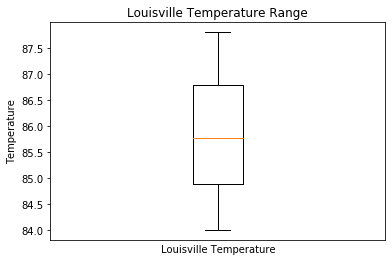

In [102]:
plt.boxplot(temperatures1)
plt.title("Louisville Temperature Range")
plt.xlabel("Louisville Temperature")
plt.ylabel("Temperature")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

**The temperature range of Louisville was at around 68 degree F with the minimum temperature around 66 F and maximum temperature appears to be around 70 F**

### 250-500-word summary of what you learned and had to do to complete the project

Upon completion of this final project, this course has taught me so much. Before I began this project, I had no idea how to web scraping, somewhat knowledge of pulling API data and how to efficiently clean and perform data wrangling. I had to go through many tutorials, reading the books, and use other resources in order for me to complete this project and perform tasks that I needed to do like how to web scrape, store data into a database and when to appropriately use certain packages. In order for me to fully complete the project, I had to perform data wrangling on my flat files, API and website sources. Then merge all of them together using a common column variable and stored these into a database. After storing the cleaned final dataframe into a database, I can then pull the dataframe back out to do visualizations. For me, web scraping with BeautifulSoup was not as easy as I initially thought it to be. Furthermore, the part that I had to most difficult time was trying to store my pandas dataframes into a database. Pulling API data was also very challenging when it comes to cleaning and storing them into a data frame because the data that got pulled was not too clean and so I had to do a lot of manipulation and data wrangling in order for me to efficiently  merged all of my data sources together. Overall, I really enjoyed this class and it has taught me the foundation that I needed to be able to build upon when I go into the real world. 